In [1]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import contextily as ctx
import matplotlib.colors
import geoplot

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["grey","yellow","blue"])

In [2]:
def in_hood(tract):
    for geom in hoods.geometry:
        if tract.intersects(geom):
            return True
    return False

def hood(point):
    for key,value in hoods.iterrows():
        if point.within(value["geometry"]):
            return value["NAME"]
    return False

In [3]:
import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

In [4]:
Borough = gp.read_file("geo_export_aa64892a-680c-44e9-a9ec-f89f756c4549.shp")
Borough = Borough.to_crs(epsg=4269)
Borough = Borough[Borough["boro_name"]!="Staten Island"]

In [6]:
hoods = gp.read_file("ZillowNeighborhoods-OH.shp")

In [23]:
hoods = gp.read_file("ZillowNeighborhoods-NY.shp")

In [8]:
hoods = hoods.to_crs(epsg=3857)

In [29]:
hoods["coords"] = hoods.geometry.centroid

In [33]:
water = gp.read_file("shape/NHDWaterbody.shp")

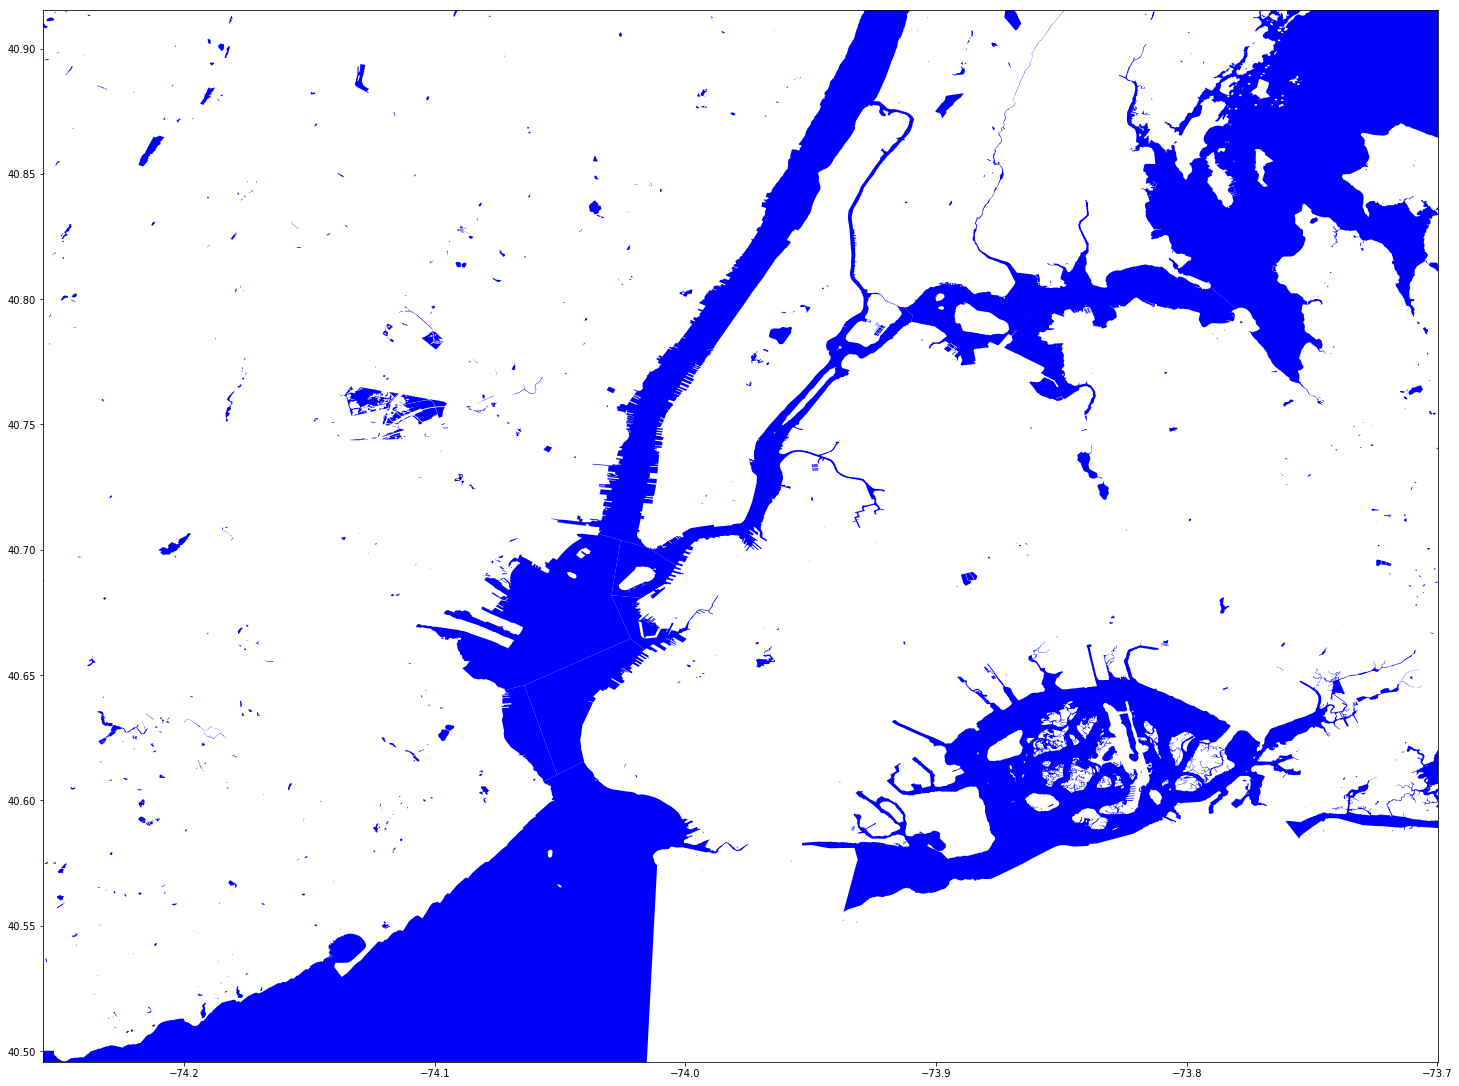

In [39]:
bounds=hoods[hoods["COUNTY"].isin(["New York","Queens", "Bronx", "Kings", "Richmond"])].bounds

ax = water.plot(
 color='blue',
 figsize=(25, 25),
)

ax.set_xlim(bounds['minx'].min(), bounds['maxx'].max())
ax.set_ylim(bounds['miny'].min(), bounds['maxy'].max())

plt.show()

In [10]:
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

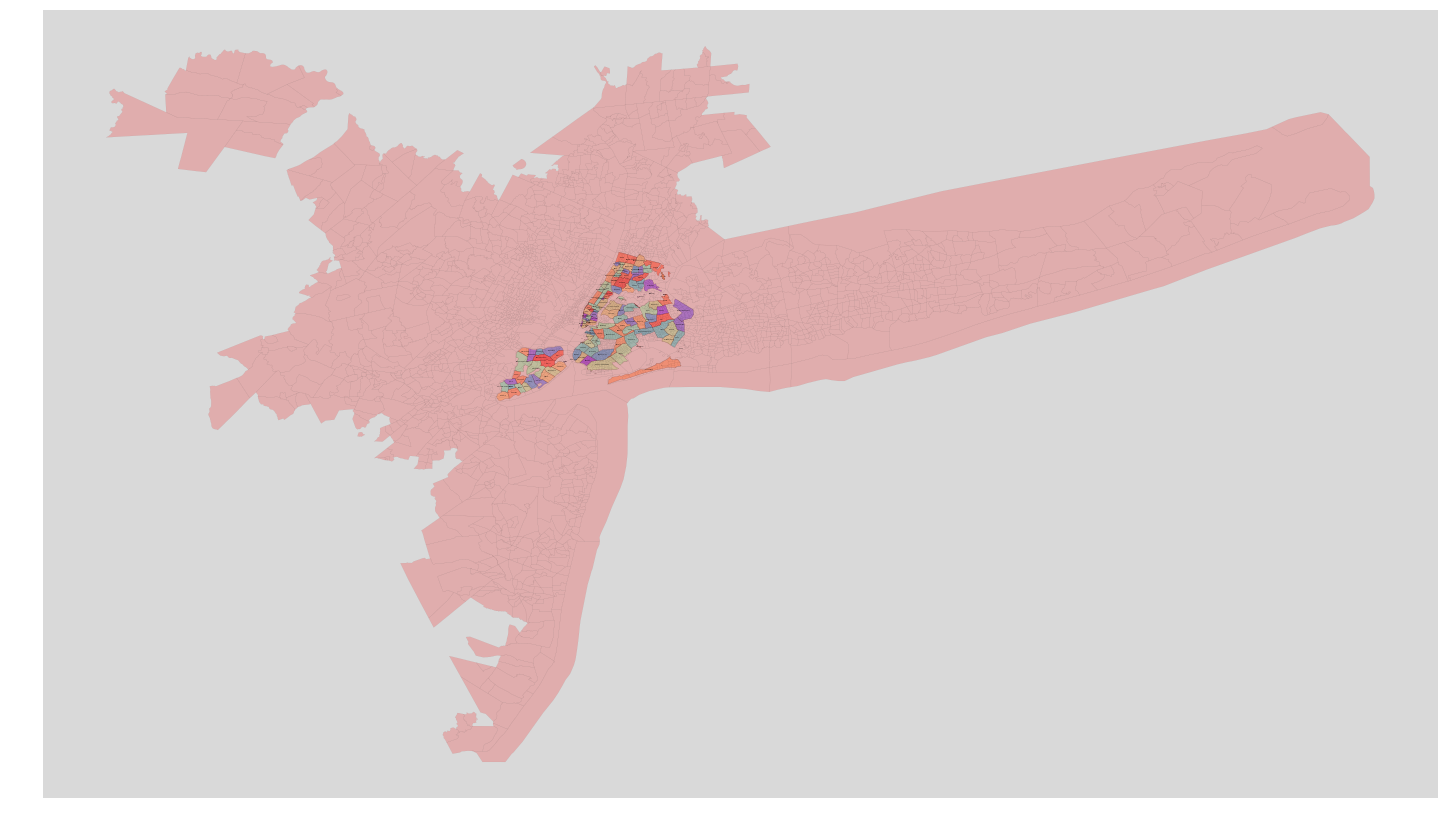

In [31]:
bounds=hoods[hoods["COUNTY"].isin(["New York","Queens", "Bronx", "Kings", "Richmond"])].bounds
# column = "2_to_4_Multi_Family_Buildings"
# vmin = geo[column].min()
# vmax = geo[column].max()

ax = hoods[hoods["COUNTY"].isin(["New York","Queens", "Bronx", "Kings", "Richmond"])].plot(
#     column=column,
    cmap="rainbow",
#     legend=True,
    figsize=(25, 25),
    alpha=0.5,
    edgecolor='black',
    linewidth=0.2,
#     markersize = geo["TOTAL_POPU"]/1000,
#     color='red',
#     scheme = 'quantiles',
)

geo_2018[geo_2018.within(msa[msa["TOTAL_POPU"]>=100000].loc[0]["geometry"])].plot(
    ax=ax,
    figsize=(25, 25),
    color="red",
    edgecolor='black',
    linewidth=0.1,
    alpha=0.2,
)

for idx, row in hoods[hoods["COUNTY"].isin(["New York","Queens", "Bronx", "Kings", "Richmond"])].iterrows():
    ax.annotate(s=row['NAME'], 
                xy=(row['coords'].x,row['coords'].y),
                horizontalalignment='center',
                verticalalignment='botom',
                fontsize= 1,
               )
    

add_basemap(ax, zoom=12, url=ctx.sources.ST_TONER_LITE)
ax.set_axis_off()
# ax.set_title("Percentage Structures with/ 5 to 9 Units in Dallas County")
# ax.set_xlim(bounds['minx'].min(), bounds['maxx'].max())
# ax.set_ylim(bounds['miny'].min(), bounds['maxy'].max())


plt.savefig('nyc3.svg')
plt.show()

In [162]:
geo_2013 = gp.read_file("2013.shp")
# geo_2013 = geo_2013.to_crs(epsg=3857)

In [20]:
geo_2018 = gp.read_file("2018.shp")
# geo_2018 = geo_2018.to_crs(epsg=3857)

In [21]:
msa = gp.read_file("MSA.shp")
# msa = msa.to_crs(epsg=3857)

In [439]:
nyc_tracts = geo_2013[geo_2013.within(msa[msa["TOTAL_POPU"]>=100000].loc[0]["geometry"])]

In [449]:
nyc_bottom_40 = nyc_tracts[nyc_tracts["MEDIAN_HOU"]<=nyc_tracts.MEDIAN_HOU.quantile(0.33)]

In [441]:
nyc_tracts_18 = geo_2018[geo_2018.within(msa[msa["TOTAL_POPU"]>=100000].loc[0]["geometry"])]

In [465]:
nyc_top_70 = nyc_tracts_18[nyc_tracts_18["MEDIAN_HOU"]>=nyc_tracts_18.MEDIAN_HOU.quantile(0.5)]

In [466]:
gentrified = nyc_top_70.merge(nyc_bottom_40[["GEO_ID","MEDIAN_HOM","MEDIAN_HOU","PERCENT_CO"]], on="GEO_ID", how='inner')
gentrified["INCOME_INCREASE"] = gentrified["MEDIAN_HOU_x"]/gentrified["MEDIAN_HOU_y"]
gentrified["COLLEGE_INCREASE"] = gentrified["PERCENT_CO_x"]/gentrified["PERCENT_CO_y"]
gentrified["VALUE_INCREASE"] = gentrified["MEDIAN_HOM_x"]/gentrified["MEDIAN_HOM_y"]
gentrified = gentrified[gentrified["COLLEGE_INCREASE"]>1.1]
gentrified = gentrified.dropna()
gentrified["centroid"] = gentrified.geometry.centroid

gentrified = gentrified.to_crs(epsg=4269)

In [468]:
points = gentrified[gentrified.geometry.apply(in_hood)].rename(columns={"geometry":"somthingelse", "centroid":"geometry",})

In [481]:
points["hood"]=points.geometry.apply(hood)

In [467]:
bounds=hoods[hoods["COUNTY"].isin(["New York","Queens", "Bronx", "Kings"])].bounds
# column = "2_to_4_Multi_Family_Buildings"
# vmin = geo[column].min()
# vmax = geo[column].max()
    
ax = msa[msa["TOTAL_POPU"]>=100000].loc[0:0].plot(
    linewidth=5,
    color="red",
    alpha=0.1,
    figsize=(25, 25),
)

# nyc_bottom_40.plot(
#     ax=ax,
#     #     column=column,
# #     cmap="rainbow",
# #     legend=True,
#     figsize=(25, 25),
# #     alpha=0.7,
#     edgecolor='black',
# #     linewidth=2,
# #     markersize = geo["TOTAL_POPU"]/1000,
#     color='blue',
# #     scheme = 'quantiles',
# )

# nyc_top_70.plot(
#     ax=ax,
#     #     column=column,
# #     cmap="rainbow",
# #     legend=True,
#     figsize=(25, 25),
# #     alpha=0.7,
#     edgecolor='black',
# #     linewidth=2,
# #     markersize = geo["TOTAL_POPU"]/1000,
#     color='green',
# #     scheme = 'quantiles',
# )

gentrified[gentrified.geometry.apply(in_hood)].plot(
    ax=ax,
    #     column=column,
#     cmap="rainbow",
#     legend=True,
    figsize=(25, 25),
#     alpha=0.7,
    edgecolor='black',
#     linewidth=2,
#     markersize = geo["TOTAL_POPU"]/1000,
    color='green',
#     scheme = 'quantiles',
)

hoods[hoods["COUNTY"].isin(["New York","Queens", "Bronx", "Kings"])].plot(
#     column=column,
    ax=ax,
#     cmap="rainbow",
#     legend=True,
    figsize=(25, 25),
    alpha=0.7,
    edgecolor='black',
    linewidth=2,
    color="none",
#     markersize = geo["TOTAL_POPU"]/1000,
#     color='red',
#     scheme = 'quantiles',
)

for idx, row in hoods[hoods["COUNTY"].isin(["New York","Queens", "Bronx", "Kings"])].iterrows():
    ax.annotate(s=row['NAME'], 
                xy=(row['coords'].x,row['coords'].y),
                horizontalalignment='center',
                verticalalignment='botom',
                fontsize= 10,
               )


# add_basemap(ax, zoom=10, url=ctx.sources.ST_TONER_LITE)
ax.set_axis_off()
# ax.set_title("Percentage Structures with/ 5 to 9 Units in Dallas County")
ax.set_xlim(bounds['minx'].min(), bounds['maxx'].max())
ax.set_ylim(bounds['miny'].min(), bounds['maxy'].max())


plt.savefig('nyc_hoods.svg')
plt.show()

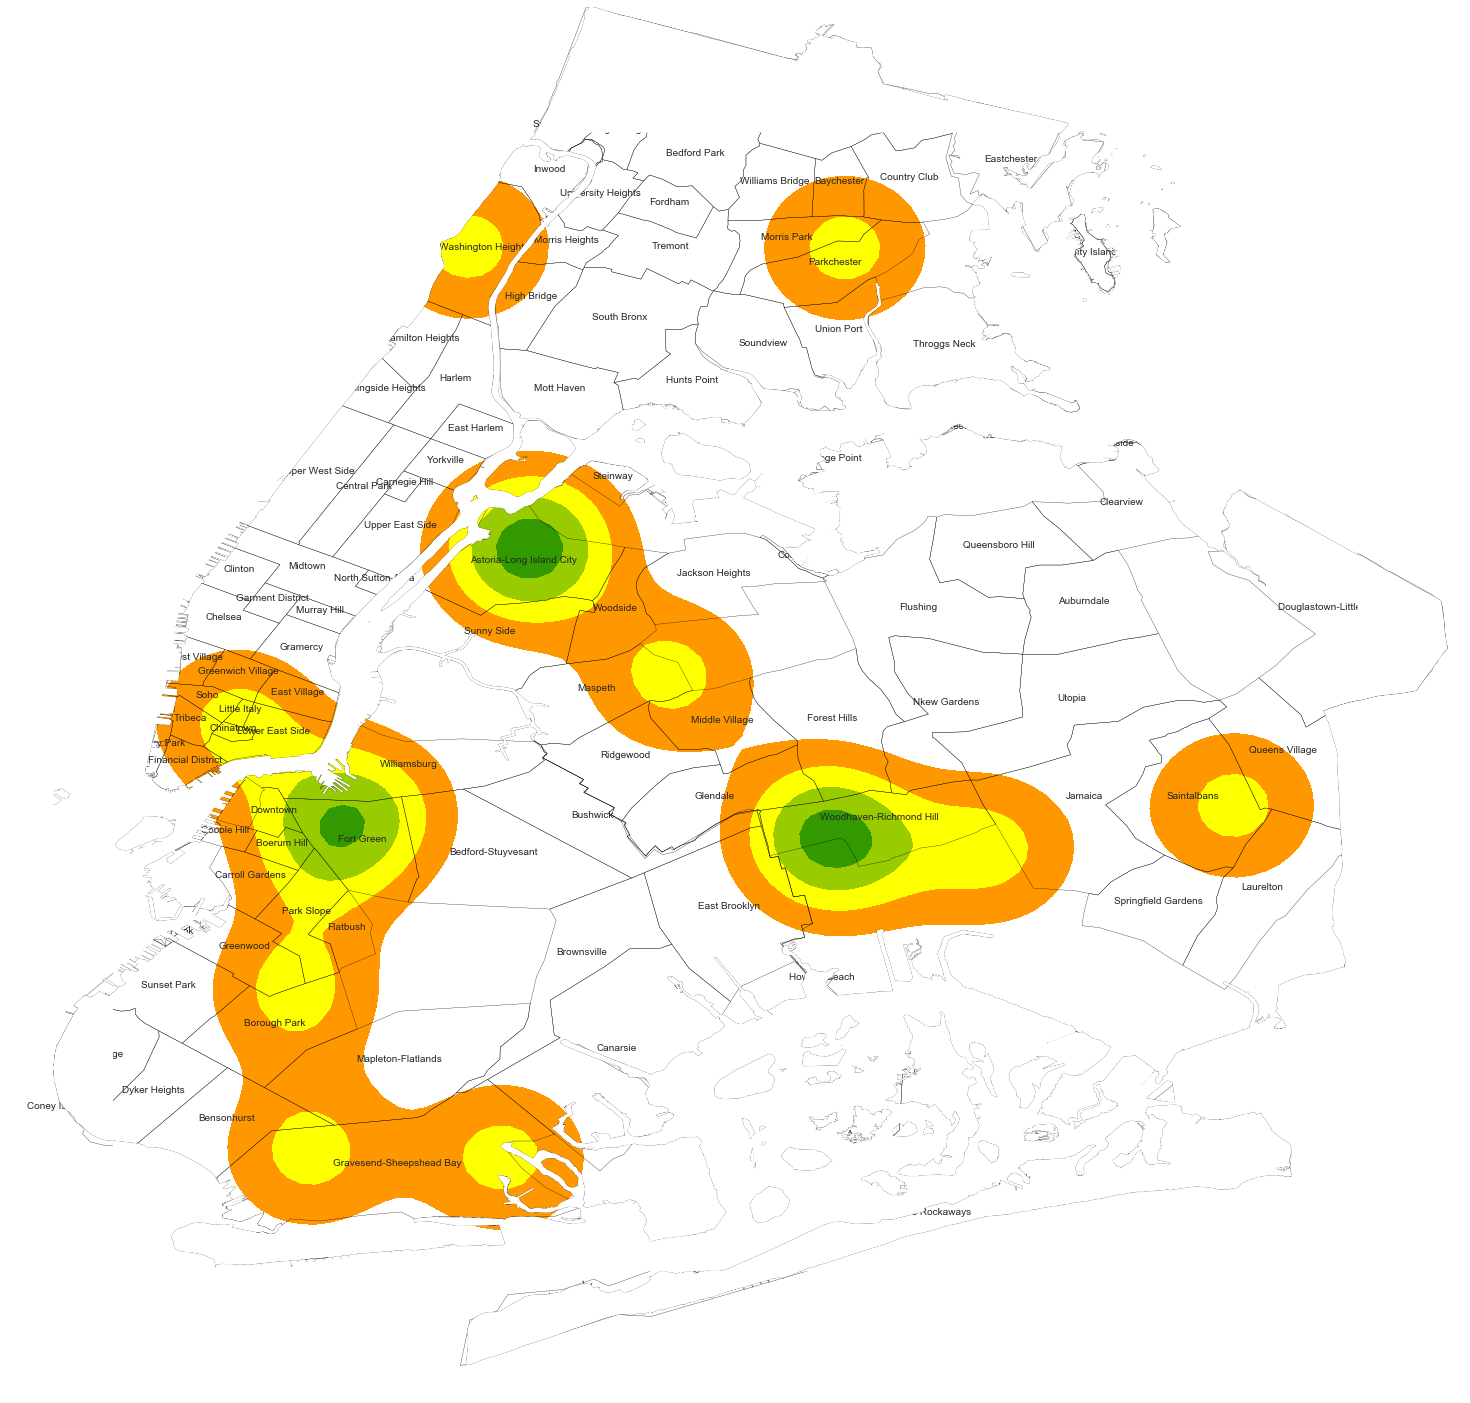

In [544]:
bounds=hoods[hoods["COUNTY"].isin(["New York","Queens", "Bronx", "Kings"])].bounds

ax = geoplot.kdeplot(
    points,
    clip=Borough.geometry,
    shade=True, 
    cmap=cmap,
#     projection=geoplot.crs.AlbersEqualArea(),
    figsize=(25, 25),
    n_levels=5,
    bw = 0.015,
    shade_lowest=False,
)
geoplot.polyplot(Borough, ax=ax, zorder=1)
geoplot.polyplot(hoods, ax=ax, zorder=1)
# ax.set_xlim(points.bounds.minx.min(), points.bounds.maxx.max())
# ax.set_ylim(points.bounds.miny.min(), points.bounds.miny.max())

for idx, row in hoods[hoods["COUNTY"].isin(["New York","Queens", "Bronx", "Kings"])].iterrows():
    ax.annotate(s=row['NAME'], 
                xy=(row['coords'].x,row['coords'].y),
                horizontalalignment='center',
                verticalalignment='botom',
                fontsize= 10,
#                 color='white',
               )
    
ax.set_xlim(bounds['minx'].min(), bounds['maxx'].max())
ax.set_ylim(bounds['miny'].min(), bounds['maxy'].max())
plt.savefig('gentrified.svg')
plt.show()

#### points.groupby("hood").count()[["GEO_ID"]].reset_index()

In [536]:
points

,GEO_ID,MEDIAN_HOM_x,MEDIAN_HOU_x,PERCENT_CO_x,somthingelse,MEDIAN_HOM_y,MEDIAN_HOU_y,PERCENT_CO_y,INCOME_INCREASE,COLLEGE_INCREASE,VALUE_INCREASE,geometry,hood
1,36005028600,456500.0,88000.0,46.256983,"POLYGON ((-73.850499 40.850696, -73.849689 40....",496700.0,36532.0,33.240223,2.408847,1.391597,0.919066,POINT (-73.84777516413685 40.84918491695499),Parkchester
2,36047019100,1106200.0,86225.0,66.843220,"POLYGON ((-73.969399 40.696093, -73.968406 40....",789400.0,49875.0,41.941282,1.728822,1.593733,1.401317,POINT (-73.96442781476573 40.69524270333753),Fort Green
3,36081007500,510500.0,81716.0,60.107740,"POLYGON ((-73.929647 40.765375, -73.9291499999...",340100.0,45163.0,45.745028,1.809357,1.313973,1.501029,POINT (-73.92732988610338 40.76454358748139),Astoria-Long Island City
4,36061004100,826000.0,80909.0,51.013202,"POLYGON ((-73.99942299999999 40.71868, -73.999...",985400.0,29977.0,33.932423,2.699036,1.503376,0.838238,POINT (-73.9966957598331 40.71916395721572),Little Italy
13,36047003500,1638200.0,79083.0,61.945032,"POLYGON ((-73.97936299999999 40.686682, -73.97...",1000001.0,48676.0,40.694789,1.624682,1.522186,1.638198,POINT (-73.97618028571171 40.68532522658803),Fort Green
14,36081001600,454800.0,78359.0,24.113475,"POLYGON ((-73.85732 40.692623, -73.85641 40.69...",397000.0,45108.0,20.202020,1.737142,1.193617,1.145592,POINT (-73.85483949802033 40.68971775377805),Woodhaven-Richmond Hill
15,36081053000,405600.0,77629.0,24.800000,"POLYGON ((-73.755556 40.697518, -73.7546689999...",400300.0,51488.0,11.603651,1.507711,2.137258,1.013240,POINT (-73.75254029102381 40.69633823782274),Saintalbans
16,36047049800,694800.0,77383.0,48.989590,"POLYGON ((-73.98835 40.644562, -73.98528399999...",647600.0,49219.0,39.160839,1.572218,1.250984,1.072884,POINT (-73.98268127809799 40.64542943266292),Borough Park
22,36081017000,415000.0,75100.0,18.104313,"POLYGON ((-73.817781 40.683504, -73.8171629999...",444000.0,44038.0,5.644599,1.705345,3.207369,0.934685,POINT (-73.81200165520988 40.68431434789058),False
24,36047063200,248400.0,74250.0,35.115722,"POLYGON ((-73.93503199999999 40.601734, -73.93...",388600.0,47361.0,31.662490,1.567746,1.109064,0.639218,POINT (-73.93156834386764 40.59976040723486),Gravesend-Sheepshead Bay


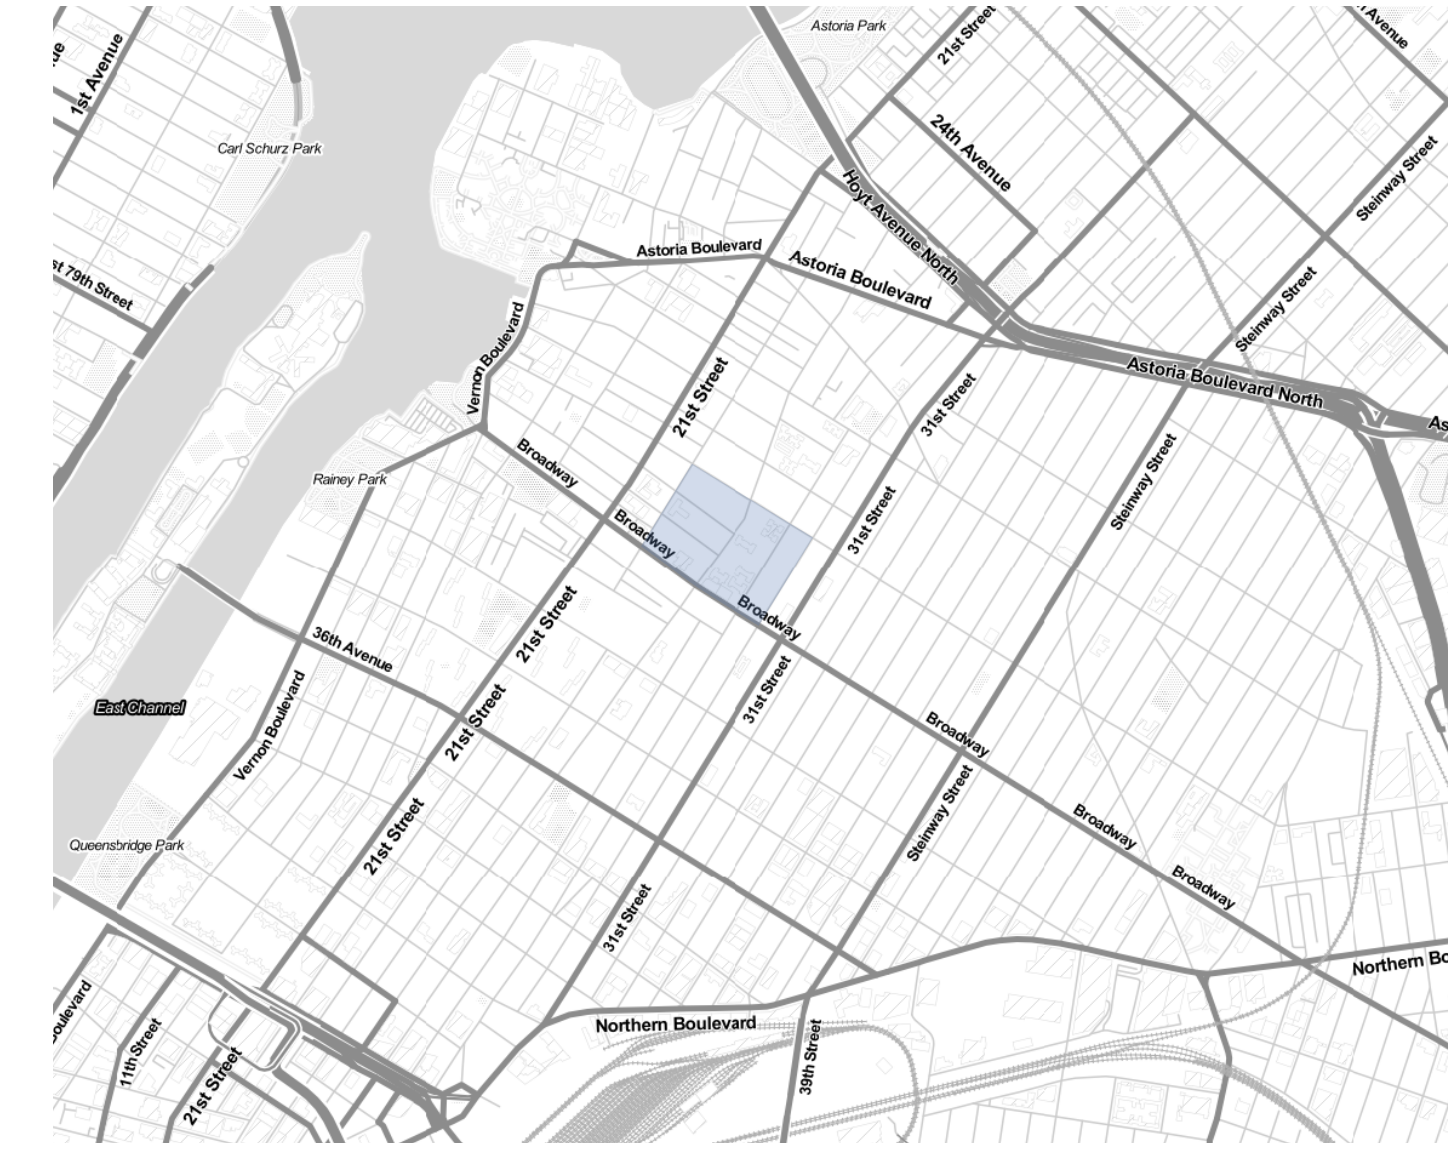

In [543]:
bounds=hoods[hoods["NAME"]==points[points["GEO_ID"]=='36081007500']["hood"].item()].to_crs(epsg=3857).bounds

ax = gentrified[gentrified["GEO_ID"]=='36081007500'].to_crs(epsg=3857).plot(
    figsize=(25, 25),
    alpha=0.25,
)

ax.set_axis_off()
ax.set_xlim(bounds['minx'].min(), bounds['maxx'].max())
ax.set_ylim(bounds['miny'].min(), bounds['maxy'].max())
add_basemap(ax, zoom=15, url=ctx.sources.ST_TONER_LITE)


plt.show()